<a href="https://colab.research.google.com/github/YianKim/Complaints-NLP-Visualization-2021/blob/main/4_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(dldks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
from tqdm import tqdm_notebook #process bar
import string #특수문자를 클리닝에서 제거해주고 싶을 때 사용하려고 특수문자를 불러온다. 
import warnings #warning 제거

from gensim import corpora
from gensim import models
import pandas as pd
import numpy as np
import re
import gzip
import pickle
import matplotlib.pyplot as  plt
from wordcloud import WordCloud
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning) # 경고 알림이 뜨면 모두 무시

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# 제목하고 내용이 list로 받아졌을 때, 중복되지 않는 원소만 편입
def merge제목내용(제목, 내용):
  temp = []
  temp += list(내용)
  for i in 제목:
    if i not in 내용:
      temp.append(i)
  return(temp)

merge제목내용(["A","B","DDD"],["A","CD"]) #['A', 'CD', 'B', 'DDD']

['A', 'CD', 'B', 'DDD']

In [53]:
# 램 한계를 극복하기 위한 글자수 제한
def 글자제한(textvec, LB, UB):
  temp=[]
  for i in textvec:
    if len(i)>LB-1 and len(i)<UB+1:
      temp.append(i)
  return(temp)

글자제한(["A","AA","AAA","AAAA","AAAAA","AAAAAA","AAAAAAA"],3,4)

['AAA', 'AAAA']

In [54]:
# load and uncompress.
with gzip.open('/content/drive/Shareddrives/2021민원/데이터/clean_data_twitter+correction.pickle','rb') as f:
    data = pickle.load(f)

In [55]:
data_overtime=data.drop(["제목", "질문내용", "답변내용", "최상위기관명", "분야명", "담당부서명", "시간"], axis=1)
data_overtime.head()

,제목_nouns,질문내용_nouns,답변내용_nouns,연,월,일,오전오후
0,"[의성군, 귀농, 귀촌, 정책, 문의]","[의성군, 귀농, 귀촌, 정책, 문의]","[의성군, 귀농, 귀촌, 감사, 귀농, 귀촌, 지원, 정책, 설명, 앞서, 귀농, ...",2021,08,27,오후
1,"[불법, 주정]","[불법, 주정, 과태료, 부과, 대상]","[귀하, 가정, 안함, 행복, 기원, 귀하, 국민신문고, 요청, 사항, 문화, 조성...",2021,08,27,오후
2,"[아동, 수당, 지급, 대상]","[아동, 수당, 지급, 대상]","[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수...",2021,08,27,오후
3,"[광견병, 예방, 접종, 문의]","[광견병, 예방접종, 질문, 사항, 의성군, 광견병, 접종, 예방, 계획, 신지, ...","[안녕하십니까, 귀하, 국민신문고, 통해, 신청, 민원, 대한, 검토, 귀하, 민원...",2021,08,27,오후
4,"[아동, 수당, 지급, 금액, 지급, 일자]","[아동, 수당, 지급, 금액, 지급, 일자]","[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수...",2021,08,27,오후


# gensim을 이용한 토픽모델링

In [133]:
# 그냥 다 합쳐보기
token_list=[]
for i in range(57249):
  # print(i)
  # temp = merge제목내용(data_overtime['제목_nouns'][i], data_overtime['질문내용_nouns'][i])
  # token_list.append(merge제목내용(temp, data_overtime['답변내용_nouns'][i]))
  token_list.append(merge제목내용(data_overtime['제목_nouns'][i], data_overtime['질문내용_nouns'][i]))

In [134]:
dictionary = corpora.Dictionary(token_list)
# dictionary.token2id

In [135]:
term_matrix = [dictionary.doc2bow(token) for token in token_list]
# term_matrix

In [136]:
tfidf = models.TfidfModel(term_matrix)

# for doc in tfidf[term_matrix]:
#     print("doc:")
#     for k, v in doc:
#         print(k, v)

In [137]:
allword=[]
for i in range(len(dictionary.token2id)):
  allword.append((i,1))

In [138]:
weight = { name:value for name, value in zip(list(dictionary.token2id.keys()), [x[1] for x in tfidf[allword]]) }

In [139]:
# fp='/content/drive/MyDrive/서울남산체/08SeoulNamsanB_0.ttf'
# wordcloud = WordCloud(background_color="white", max_words=100, width=4000, height=3000, font_path=fp).generate_from_frequencies(weight)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [140]:
# 토픽모델링

model = models.LdaModel(corpus=term_matrix, id2word=dictionary, num_topics=10)
model.print_topics()

[(0,
  '0.027*"광고" + 0.018*"해양" + 0.016*"설치" + 0.014*"구역" + 0.013*"시설" + 0.013*"측정" + 0.012*"물질" + 0.011*"하천" + 0.010*"보관" + 0.010*"불법"'),
 (1,
  '0.037*"발표" + 0.018*"방송" + 0.017*"계약" + 0.016*"내용" + 0.012*"제조" + 0.011*"질의" + 0.011*"대한" + 0.010*"인지" + 0.010*"관리" + 0.009*"동의"'),
 (2,
  '0.051*"세부" + 0.026*"정보" + 0.024*"내용" + 0.018*"방법" + 0.017*"신청" + 0.013*"복무" + 0.011*"시험" + 0.010*"가능" + 0.010*"방통위" + 0.010*"서비스"'),
 (3,
  '0.033*"위원회" + 0.014*"민원" + 0.014*"가능" + 0.013*"국가" + 0.011*"제조" + 0.011*"기간" + 0.011*"개최" + 0.009*"조사" + 0.009*"문의" + 0.008*"대한"'),
 (4,
  '0.043*"평가" + 0.015*"설치" + 0.015*"포장" + 0.015*"품목" + 0.013*"영향" + 0.012*"발생" + 0.012*"위치" + 0.011*"선박" + 0.011*"저장" + 0.011*"설계"'),
 (5,
  '0.046*"허가" + 0.045*"신고" + 0.033*"변경" + 0.031*"신청" + 0.029*"등록" + 0.024*"서류" + 0.022*"어업" + 0.021*"기간" + 0.019*"방법" + 0.018*"절차"'),
 (6,
  '0.020*"항만" + 0.017*"차량" + 0.014*"환경" + 0.013*"제한" + 0.013*"축산" + 0.013*"이란" + 0.012*"품질" + 0.012*"개선" + 0.012*"부과" + 0.010*"규제"'),
 (7,
  '0.060*"시설" + 0.0

In [154]:
# save and compress.
with gzip.open('/content/drive/Shareddrives/2021민원/데이터/twitterLDA.pickle', 'wb') as f:
    pickle.dump(model, f)

In [155]:
# load and uncompress.
with gzip.open('/content/drive/Shareddrives/2021민원/데이터/twitterLDA.pickle','rb') as f:
    model = pickle.load(f)

In [143]:
fp='/content/drive/MyDrive/서울남산체/08SeoulNamsanB_0.ttf'

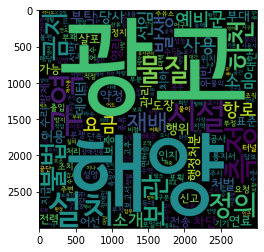

In [144]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(0, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic0.png')

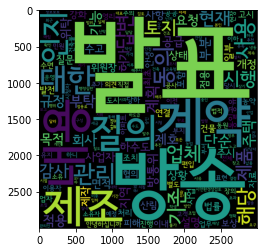

In [145]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(1, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic1.png')

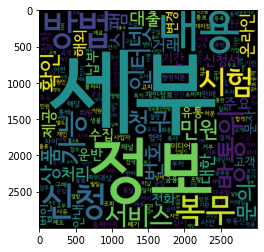

In [146]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(2, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic2.png')

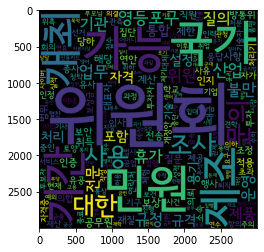

In [147]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(3, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic3.png')

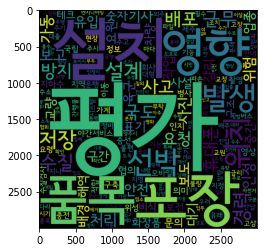

In [148]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(4, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic4.png')

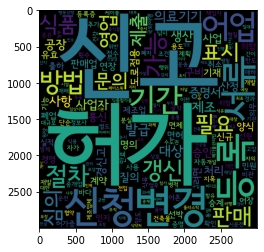

In [149]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(5, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic5.png')

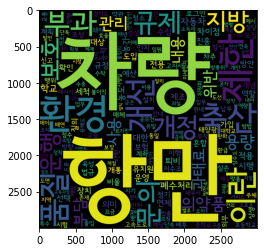

In [150]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(6, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic6.png')

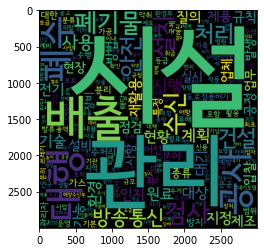

In [151]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(7, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic7.png')

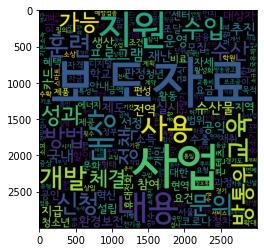

In [152]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(8, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic8.png')

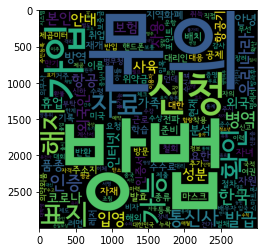

In [153]:
plt.imshow(WordCloud(font_path=fp, width=3000, height=3000).fit_words(dict(model.show_topic(9, 200))))
plt.savefig('/content/drive/Shareddrives/2021민원/시각화/topic9.png')

In [156]:
from tqdm import tqdm
data["토픽"]=0
for i in tqdm(range(57249)):
  temp = model.get_document_topics(term_matrix[i])
  temp.sort(key=lambda x:x[1], reverse=True)
  data["토픽"][i]=temp[0][0]

  0%|          | 0/57249 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
100%|██████████| 57249/57249 [00:23<00:00, 2394.50it/s]


In [157]:
data

,제목,제목_nouns,질문내용,질문내용_nouns,답변내용,답변내용_nouns,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
0,의성군 귀농귀촌 정책 문의,"[의성군, 귀농, 귀촌, 정책, 문의]",의성군 귀농귀촌 정책 문의,"[의성군, 귀농, 귀촌, 정책, 문의]",우선 저희 의성군으로 귀농귀촌하고자 하셔서 감사합니다 귀농귀촌 지원정책을 설명하기에...,"[의성군, 귀농, 귀촌, 감사, 귀농, 귀촌, 지원, 정책, 설명, 앞서, 귀농, ...",경상북도 의성군,행정/자치/안전,농업기술센터,2021,08,27,오후,3:31:44,7
1,불법주정차 신고합니다,"[불법, 주정]",대 불법주정차 과태료 부과 대상,"[불법, 주정, 과태료, 부과, 대상]",귀하의 가정에 평안함과 행복을 기원합니다 귀하께서 국민신문고로 요청하신 사항에 대하...,"[귀하, 가정, 안함, 행복, 기원, 귀하, 국민신문고, 요청, 사항, 문화, 조성...",경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,1:49:33,6
2,아동수당 지급 대상,"[아동, 수당, 지급, 대상]",아동수당 지급 대상이 궁금합니다,"[아동, 수당, 지급, 대상]",안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,"[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수...",경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,0
3,광견병 예방 접종 관련 문의,"[광견병, 예방, 접종, 문의]",광견병 예방접종 질문사항 의성군에서 광견병 접종 예방 계획이 있으신지요 있다면 기간...,"[광견병, 예방접종, 질문, 사항, 의성군, 광견병, 접종, 예방, 계획, 신지, ...",안녕하십니까 귀하께서 국민신문고를 통해 신청하신 민원에 대한 검토 결과를 다음과 같...,"[안녕하십니까, 귀하, 국민신문고, 통해, 신청, 민원, 대한, 검토, 귀하, 민원...",경상북도 의성군,행정/자치/안전,농축산과,2021,08,27,오후,4:18:09,5
4,아동수당 지급 금액과 지급 일자,"[아동, 수당, 지급, 금액, 지급, 일자]",아동수당 지급 금액과 지급 일자가 궁금합니다,"[아동, 수당, 지급, 금액, 지급, 일자]",안녕하십니까 귀하께서 문의하신 질의에 대한 답변을 다음과 같이 알려드립니다 귀하의 ...,"[안녕하십니까, 귀하, 문의, 질의, 대한, 답변, 귀하, 질의, 내용, 아동, 수...",경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57244,연안복합 낚시어선의 등화 광력 기준은 어떻게 되나요,"[연안, 복합, 낚시, 어선, 등화, 광력]",연안복합 낚시어선의 등화 광력 기준은 어떻게 되나요,"[연안, 복합, 낚시, 어선, 등화, 광력]",연안복합어업의 어선에 집어등과 작업등을 설치하는 경우 집어등은 집어등용 설비 안정기...,"[연안, 복합, 어업, 어선, 작업, 치하, 등용, 설비, 안정, 전선, 소켓, 포...",해양수산부,국토/교통/농림/해양,무궁화21호,2021,07,14,오후,4:34:58,5
57245,해기사 시험은 어떻게 시행되고 있는가,"[해기, 시험, 시행]",해기사 시험은 어떻게 시행되고 있습니까,"[해기, 시험, 시행]",해기사 시험은 정기시험과 상시시험이 있음 정기시험은 연간회 전국 개 지역에서 실시 ...,"[해기, 시험, 정기시, 상시, 시험, 정기시, 연간, 전국, 지역, 실시, 상시,...",해양수산부,국토/교통/농림/해양,선원해사안전과,2021,07,18,오후,4:06:59,2
57246,유선의 선원법 관련 법령 적용 여부,"[유선, 선원, 법령, 적용]",유선의 선원법 관련 법령 적용 여부,"[유선, 선원, 법령, 적용]",총톤수 톤 이상 선박으로서 항 밖을 운항하는 유선은 유선 및 도선사업법의적용 외에도...,"[톤수, 선박, 항하, 유선, 유선, 도선사, 업법, 의적, 선원, 제조, 적용, ...",해양수산부,국토/교통/농림/해양,선원해사안전과,2021,07,18,오후,4:08:03,3
57247,전문사모집합투자업 등록 요건 문의,"[전문, 집합, 투자, 등록, 요건, 문의]",전문사모집합투자업 등록 요건 문의,"[전문, 집합, 투자, 등록, 요건, 문의]",전문사모집합투자업 등록 요건은 자본시장과 금융투자업에 관한 법률에 마련되어 있으며 ...,"[전문, 집합, 투자, 등록, 요건, 자본시장, 금융투자, 법률, 마련, 금융감독원...",금융위원회,재정/금융/소비자,자산운용과,2021,07,20,오전,10:47:56,8


In [158]:
# save and compress.
with gzip.open('/content/drive/Shareddrives/2021민원/데이터/data_topictwit.pickle', 'wb') as f:
    pickle.dump(data, f)

In [159]:
# load and uncompress.
with gzip.open('/content/drive/Shareddrives/2021민원/데이터/data_topictwit.pickle','rb') as f:
    data = pickle.load(f)

In [162]:
data.drop(['제목',	'제목_nouns',	'질문내용',	'질문내용_nouns',	'답변내용',	'답변내용_nouns'], axis=1)

,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
0,경상북도 의성군,행정/자치/안전,농업기술센터,2021,08,27,오후,3:31:44,7
1,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,1:49:33,6
2,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,0
3,경상북도 의성군,행정/자치/안전,농축산과,2021,08,27,오후,4:18:09,5
4,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,0
...,...,...,...,...,...,...,...,...,...
57244,해양수산부,국토/교통/농림/해양,무궁화21호,2021,07,14,오후,4:34:58,5
57245,해양수산부,국토/교통/농림/해양,선원해사안전과,2021,07,18,오후,4:06:59,2
57246,해양수산부,국토/교통/농림/해양,선원해사안전과,2021,07,18,오후,4:08:03,3
57247,금융위원회,재정/금융/소비자,자산운용과,2021,07,20,오전,10:47:56,8


# 토픽 별 시각화


In [163]:
visdata = data.drop(['제목',	'제목_nouns',	'질문내용',	'질문내용_nouns',	'답변내용',	'답변내용_nouns'], axis=1)

In [164]:
visdata

,최상위기관명,분야명,담당부서명,연,월,일,오전오후,시간,토픽
0,경상북도 의성군,행정/자치/안전,농업기술센터,2021,08,27,오후,3:31:44,7
1,경상북도 의성군,행정/자치/안전,일자리창출과,2021,08,27,오후,1:49:33,6
2,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:19:51,0
3,경상북도 의성군,행정/자치/안전,농축산과,2021,08,27,오후,4:18:09,5
4,경상북도 의성군,행정/자치/안전,복지과,2021,08,27,오후,4:24:24,0
...,...,...,...,...,...,...,...,...,...
57244,해양수산부,국토/교통/농림/해양,무궁화21호,2021,07,14,오후,4:34:58,5
57245,해양수산부,국토/교통/농림/해양,선원해사안전과,2021,07,18,오후,4:06:59,2
57246,해양수산부,국토/교통/농림/해양,선원해사안전과,2021,07,18,오후,4:08:03,3
57247,금융위원회,재정/금융/소비자,자산운용과,2021,07,20,오전,10:47:56,8


## 오전오후

In [172]:
visdata1 = visdata[['오전오후', '토픽']]
오전토픽 = list(visdata1['토픽'][visdata1['오전오후']=='오전'])
오후토픽 = list(visdata1['토픽'][visdata1['오전오후']=='오후'])

In [177]:
오전토픽빈도=dict()
for i in 오전토픽:
  if i in 오전토픽빈도:
    오전토픽빈도[i] += 1
  else:
    오전토픽빈도[i] = 1

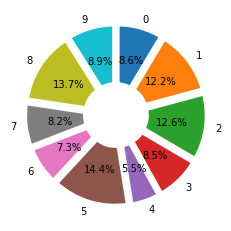

In [198]:
ratio = [1233,1752,1815,1226,789,2068,1043,1184,1967,1282]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

In [178]:
오후토픽빈도=dict()
for i in 오후토픽:
  if i in 오후토픽빈도:
    오후토픽빈도[i] += 1
  else:
    오후토픽빈도[i] = 1

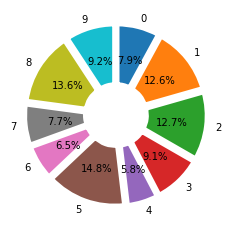

In [199]:
ratio = [2882,4591,4619,3287,2096,5390,2361,2781,4954,3354]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

## 지역

In [200]:
visdata2 = visdata[['최상위기관명', '토픽']]

경기도 강원도 충청도 전라남도 전라북도 경상남도 경상북도 제주 

광주광역시 대구광역시 대전광역시 부산광역시 서울특별시 인천광역시 울산광역시 세종특별자치시

In [274]:
visdata2['지역명'] = '.'
for i in tqdm(range(57249)):
  for j in ["경기","강원","충청","전라","경상","제주","광주광역시","대구광역시","대전광역시","부산광역시","서울특별시","인천광역시","울산광역시","세종특별자치시"]:
    if j in visdata2['최상위기관명'][i]:
      visdata2['지역명'][i] = j

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
  0%|          | 0/57249 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

### 지역 토픽 빈도 dict

In [275]:
경기토픽 = list(visdata2['토픽'][visdata2['지역명']=='경기'])
경기토픽빈도=dict()
for i in 경기토픽:
  if i in 경기토픽빈도:
    경기토픽빈도[i] += 1
  else:
    경기토픽빈도[i] = 1

In [276]:
강원토픽 = list(visdata2['토픽'][visdata2['지역명']=='강원'])
강원토픽빈도=dict()
for i in 강원토픽:
  if i in 강원토픽빈도:
    강원토픽빈도[i] += 1
  else:
    강원토픽빈도[i] = 1

In [277]:
충청토픽 = list(visdata2['토픽'][visdata2['지역명']=='충청'])
충청토픽빈도=dict()
for i in 충청토픽:
  if i in 충청토픽빈도:
    충청토픽빈도[i] += 1
  else:
    충청토픽빈도[i] = 1

In [278]:
전라토픽 = list(visdata2['토픽'][visdata2['지역명']=='전라'])
전라토픽빈도=dict()
for i in 전라토픽:
  if i in 전라토픽빈도:
    전라토픽빈도[i] += 1
  else:
    전라토픽빈도[i] = 1

In [279]:
경상토픽 = list(visdata2['토픽'][visdata2['지역명']=='경상'])
경상토픽빈도=dict()
for i in 경상토픽:
  if i in 경상토픽빈도:
    경상토픽빈도[i] += 1
  else:
    경상토픽빈도[i] = 1

In [280]:
제주토픽 = list(visdata2['토픽'][visdata2['지역명']=='제주'])
제주토픽빈도=dict()
for i in 제주토픽:
  if i in 제주토픽빈도:
    제주토픽빈도[i] += 1
  else:
    제주토픽빈도[i] = 1

### 도별 plot

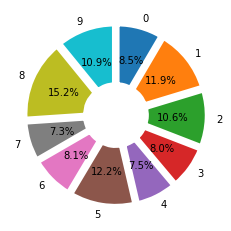

In [293]:
#경기토픽빈도
ratio = [216,303,270,204,192,311,207,186,388,278]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

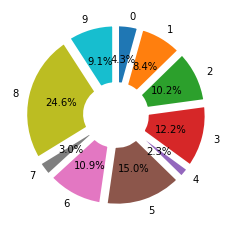

In [265]:
#강원토픽빈도
ratio = [17,33,40,48,9,59,43,12,97,36]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

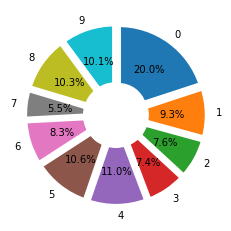

In [283]:
#충청토픽빈도
ratio = [397,185,151,147,219,211,165,109,204,201]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

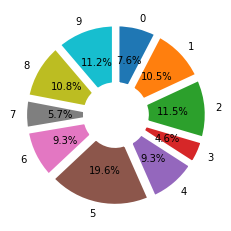

In [285]:
#전라토픽빈도
ratio = [129,177,194,77,157,332,158,96,182,190]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

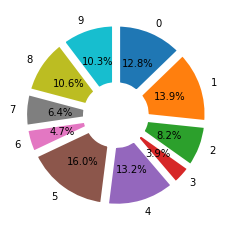

In [287]:
#경상토픽빈도
ratio = [214,233,137,66,222,268,79,108,177,173]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()

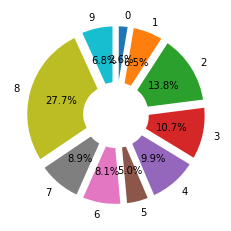

In [289]:
#제주토픽빈도
ratio = [10,25,53,41,38,19,31,34,106,26]
labels = [0,1,2,3,4,5,6,7,8,9]
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, wedgeprops=wedgeprops)
plt.show()